In [8]:
import pandas as pd 

df = pd.read_csv('/hydro_data/mm-2-0_0_0_0_0_0.csv') # change file directory for data file

In [9]:
df.head()

,id,Cat_1,Cat_2,Cat_3,AgriDemand,CommercialDemand,Country,CurrentHVLineDist,CurrentMVLineDist,EducationDemand,...,MinGridDist2030,ElectrificationOrder2030,MinimumOverall2030,MinimumOverallLCOE2030,MinimumOverallCode2030,InvestmentCost2030,ElecStatusIn2030,InvestmentCapita2030,FinalElecCode2030,NewCapacity2030
0,277604,0,0,0,0,0,Myanmar,20.482,2.476,1642.5,...,0.000000,0,Grid2030,0.052000,1.0,8818.8630,1,256.47470,1.0,5.593318
1,277606,0,0,0,0,0,Myanmar,1.774,7.517,1642.5,...,8.582934,1,Grid2030,0.095860,1.0,201811.8600,1,429.50864,2.0,76.432175
2,277610,0,0,0,0,0,Myanmar,16.273,8.791,0.0,...,0.474762,2,Grid2030,0.163389,1.0,32124.5740,1,375.86590,2.0,6.612564
3,277611,0,0,0,0,0,Myanmar,14.844,7.730,0.0,...,8.685671,1,Grid2030,0.146179,1.0,119797.7100,1,700.83220,2.0,27.905878
4,277615,0,0,0,0,0,Myanmar,141.463,129.353,1642.5,...,0.000000,3,Grid2030,0.052000,1.0,6512.1904,1,218.90974,2.0,3.663230


In [10]:
# save the file in a new format with less storage space
df.shape

(303758, 80)

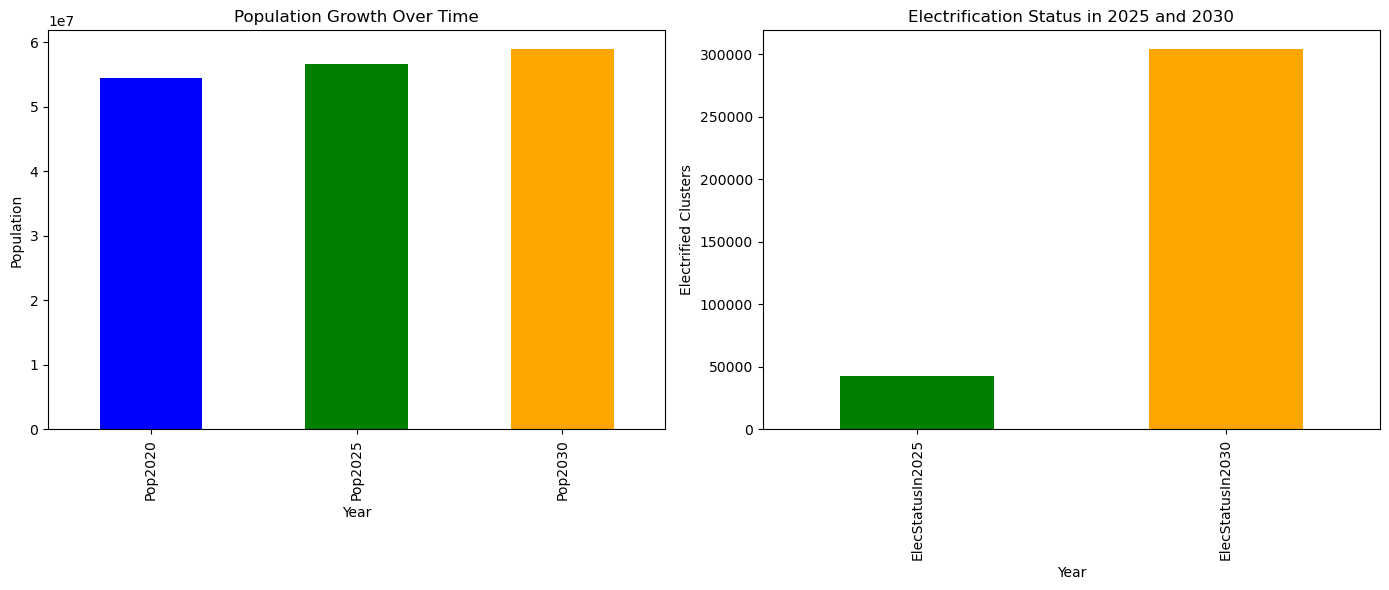

In [17]:
# print first 5 rows of the dataframe but have all columns displayed
import pandas as pd
import matplotlib.pyplot as plt

# Plot population and electrification status over time
years = [2020, 2025, 2030]
pop_columns = ['Pop2020', 'Pop2025', 'Pop2030']
elec_status_columns = ['ElecStatusIn2025', 'ElecStatusIn2030']

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Population growth over time
df[pop_columns].sum().plot(kind='bar', ax=ax[0], color=['blue', 'green', 'orange'])
ax[0].set_title('Population Growth Over Time')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Population')

# Electrification status comparison
df[elec_status_columns].sum().plot(kind='bar', ax=ax[1], color=['green', 'orange'])
ax[1].set_title('Electrification Status in 2025 and 2030')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Electrified Clusters')

plt.tight_layout()
plt.show()

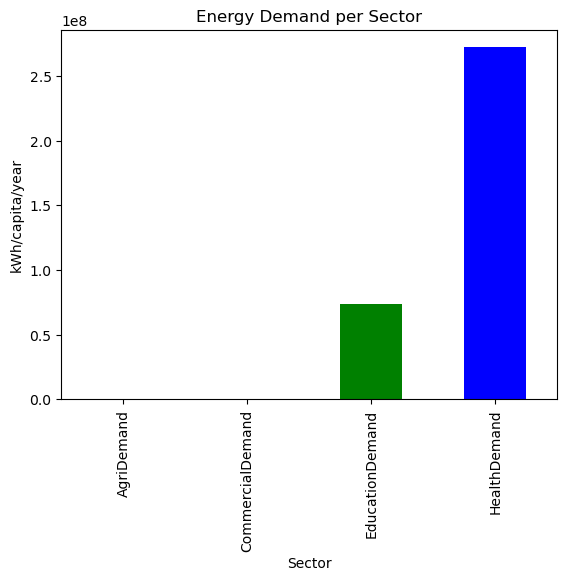

In [18]:
# Plot energy demand for different sectors
sector_demand_cols = ['AgriDemand', 'CommercialDemand', 'EducationDemand', 'HealthDemand']

df[sector_demand_cols].sum().plot(kind='bar', color=['yellow', 'red', 'green', 'blue'])
plt.title('Energy Demand per Sector')
plt.xlabel('Sector')
plt.ylabel('kWh/capita/year')
plt.show()

In [28]:
### 1. Electrification Analysis ###
# Q1: Average distance to current HV and MV lines for electrified areas
avg_hv_mv_dist = df[df['FinalElecCode2020'] == 1][['CurrentHVLineDist', 'CurrentMVLineDist']].mean()
print("Average distance to current HV lines:", avg_hv_mv_dist['CurrentHVLineDist'])
print("Average distance to current MV lines:", avg_hv_mv_dist['CurrentMVLineDist'])

Average distance to current HV lines: 19.002844577929828
Average distance to current MV lines: 1.1810398599729492


In [40]:
df['ElecStatusIn2030']

0         1
1         1
2         1
3         1
4         1
         ..
303753    1
303754    1
303755    1
303756    1
303757    1
Name: ElecStatusIn2030, Length: 303758, dtype: int64

Distance to planned HV/MV lines by electrification status in 2025:
                    PlannedHVLineDist  PlannedMVLineDist
FinalElecCode2025                                      
1.0                        19.002845           1.181040
2.0                        43.859816          30.222957
5.0                       263.290645         184.582861
7.0                        99.174853         105.984533


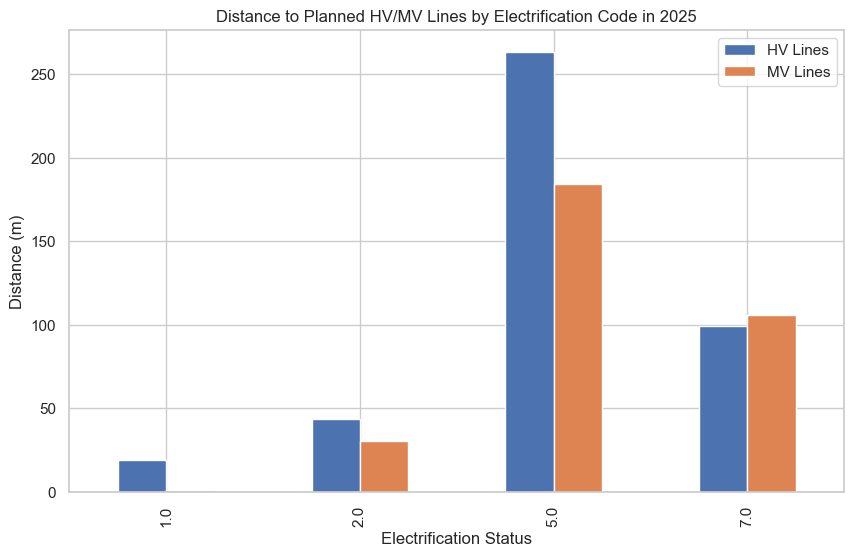

In [41]:
# Q2: Distance to planned HV/MV lines and electrification status in 2025
df_dist_elect = df[df['FinalElecCode2025'] != 99]
planned_dist_elec2025 = df_dist_elect.groupby('FinalElecCode2025')[['PlannedHVLineDist', 'PlannedMVLineDist']].mean()
print("Distance to planned HV/MV lines by electrification status in 2025:\n", planned_dist_elec2025)

# Plot distance to planned HV/MV lines by electrification status in 2025
planned_dist_elec2025.plot(kind='bar', figsize=(10, 6))

plt.title('Distance to Planned HV/MV Lines by Electrification Code in 2025')
plt.xlabel('Electrification Status')
plt.ylabel('Distance (m)')
plt.legend(['HV Lines', 'MV Lines'])
plt.show()

Population distribution by electrification status in 2025:
 FinalElecCode2025
1.0    2.362808e+07
2.0    1.277015e+07
5.0    1.177077e+06
7.0    5.040853e+04
Name: Pop, dtype: float64


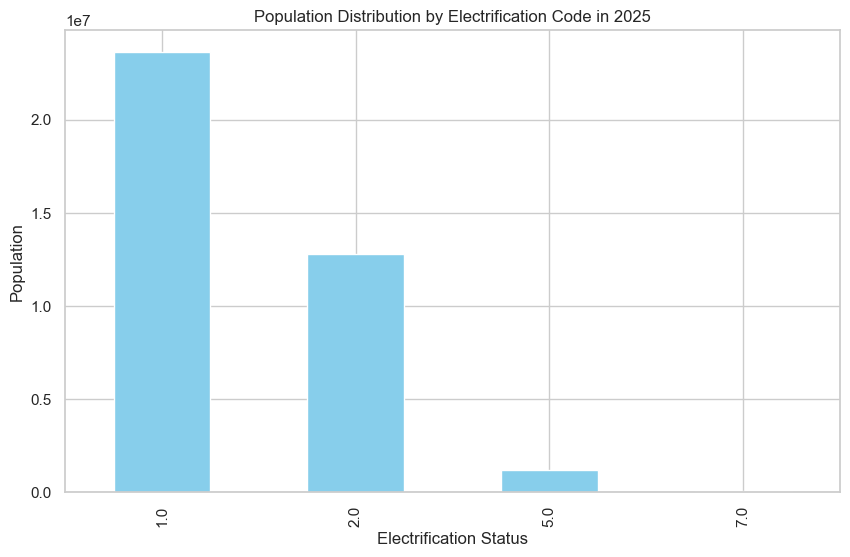

In [43]:
# Q3: Population distribution based on electrification status in 2025
pop_elec2025 = df_dist_elect.groupby('FinalElecCode2025')['Pop'].sum()
print("Population distribution by electrification status in 2025:\n", pop_elec2025)

# Plot population distribution by electrification status in 2025
pop_elec2025.plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title('Population Distribution by Electrification Code in 2025')
plt.xlabel('Electrification Status')
plt.ylabel('Population')
plt.show()

Regions with highest investment cost in 2025:
             Admin1  InvestmentCost2025
229360  Taninthayi          58927188.0
270743     Sagaing          39955236.0
202010     Rakhine          37388976.0
228432  Taninthayi          34557420.0
222259    Shan (E)          26665520.0
209701      Yangon          26228510.0
197653       Kayin          23682918.0
210144  Ayeyawaddy          21407632.0
217429       Kayin          20021476.0
299989     Rakhine          19558066.0


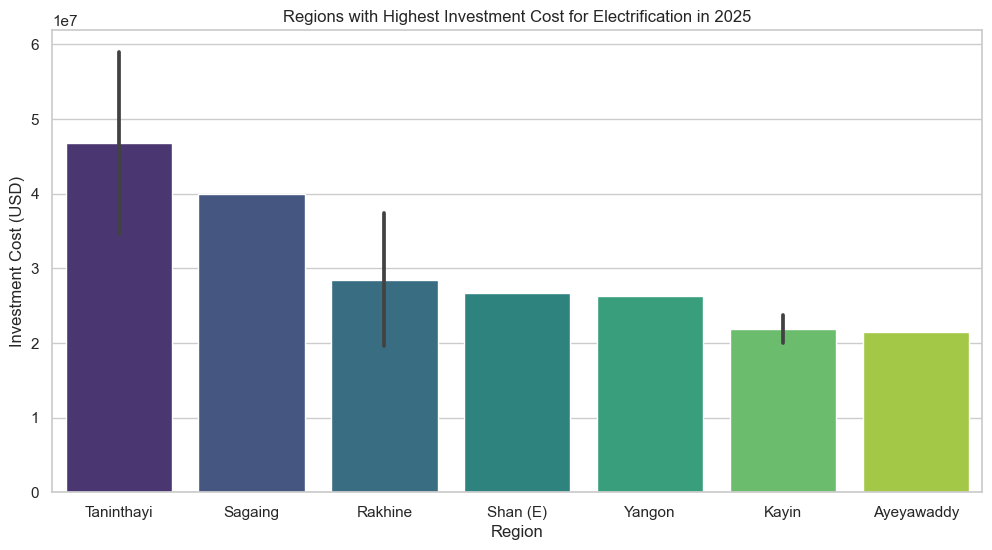

In [47]:
import seaborn as sns

# Q4: Regions with highest investment cost for electrification in 2025
high_investment_regions_2025 = df[['Admin1', 'InvestmentCost2025']].sort_values(by='InvestmentCost2025', ascending=False).head(10)
print("Regions with highest investment cost in 2025:\n", high_investment_regions_2025)

# Plot regions with highest investment cost for electrification in 2025
plt.figure(figsize=(12, 6))
sns.barplot(data=high_investment_regions_2025, x='Admin1', y='InvestmentCost2025', palette='viridis')

plt.title('Regions with Highest Investment Cost for Electrification in 2025')
plt.xlabel('Region')
plt.ylabel('Investment Cost (USD)')
plt.show()

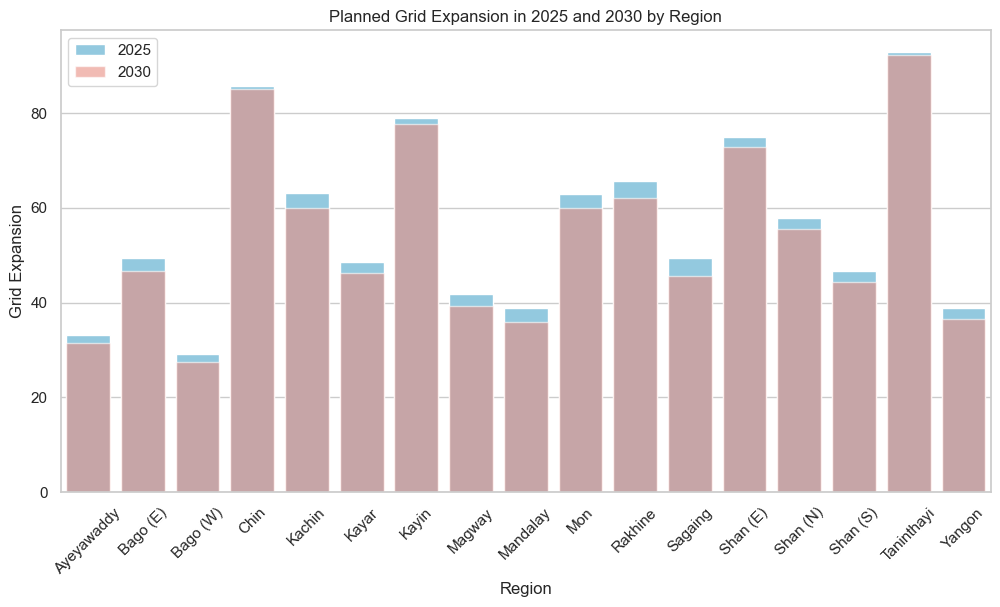

In [58]:
# Q5: Grid expansion in 2025 and 2030
grid_expansion = df[['Admin1', 'Grid2025', 'Grid2030']].groupby('Admin1').mean()
# print("Grid expansion in 2025 and 2030 by region:\n", grid_expansion)

# Plot grid expansion in 2025 and 2030 by region
plt.figure(figsize=(12, 6))

sns.barplot(data=grid_expansion, x=grid_expansion.index, y='Grid2025', color='skyblue', label='2025')
sns.barplot(data=grid_expansion, x=grid_expansion.index, y='Grid2030', color='salmon', label='2030', alpha=0.6)

plt.title('Planned Grid Expansion in 2025 and 2030 by Region')
plt.xlabel('Region')
plt.ylabel('Grid Expansion')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [59]:
# Q6: Relation between population growth and grid electrification
df['PopGrowth2025'] = df['Pop2025'] - df['PopStartYear']
pop_grid_corr = df[['PopGrowth2025', 'Grid2025']].corr().iloc[0, 1]
print("Correlation between population growth and grid electrification in 2025:", pop_grid_corr)

Correlation between population growth and grid electrification in 2025: -0.028474412140952175


Average distance to hydropower sources: 21.899003471370424
Correlation between distance to hydropower and electrification in 2025: 0.09170753642404297


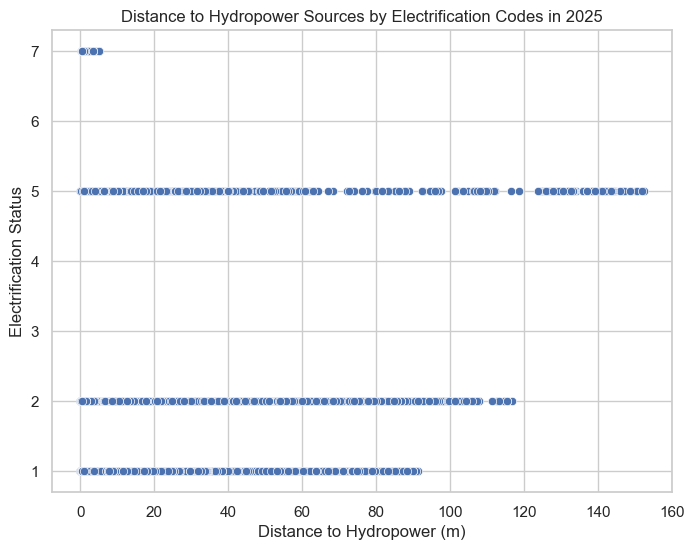

In [65]:
# Q1: Average distance to hydropower sources
avg_hydro_dist = df['HydropowerDist'].mean()
print("Average distance to hydropower sources:", avg_hydro_dist)

# Q2: Relation between distance to hydropower and electrification
hydro_elec_corr_2025 = df_dist_elect[['HydropowerDist', 'FinalElecCode2025']].corr().iloc[0, 1]
print("Correlation between distance to hydropower and electrification in 2025:", hydro_elec_corr_2025)

# plot the correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_dist_elect, x='HydropowerDist', y='FinalElecCode2025')
plt.title('Distance to Hydropower Sources by Electrification Codes in 2025')
plt.xlabel('Distance to Hydropower (m)')
plt.ylabel('Electrification Status')
plt.show()

In [75]:
df['MG_Hydro2025'].value_counts()

MG_Hydro2025
99.000000    279286
1.110508          9
1.271044          6
1.607508          6
0.775753          5
              ...  
1.239211          1
0.783350          1
0.586755          1
0.753985          1
0.305578          1
Name: count, Length: 24295, dtype: int64

In [91]:
# Q4: Regions with highest potential for hydropower development
high_potential_hydro = df.groupby('Admin1')[['HydropowerDist', 'MG_Hydro2025']].median().sort_values(by='MG_Hydro2025', ascending=False).head(10)
print("Regions with highest potential for hydropower development:\n", high_potential_hydro)

Regions with highest potential for hydropower development:
             HydropowerDist  MG_Hydro2025
Admin1                                  
Ayeyawaddy       29.410287          99.0
Mon              21.215003          99.0
Taninthayi       17.022800          99.0
Shan (S)         11.904730          99.0
Shan (N)         11.281502          99.0
Shan (E)         11.672658          99.0
Sagaing          13.730398          99.0
Rakhine          26.975100          99.0
Mandalay         15.494533          99.0
Bago (E)         18.614650          99.0


In [86]:
# Q1: Per capita energy demand for different regions
df['PerCapitaDemand'] = df['TotalEnergyPerCell'] / df['Pop']
per_capita_demand = df.groupby('Admin1')['PerCapitaDemand'].median()
print("Per capita energy demand by region:\n", per_capita_demand)

Per capita energy demand by region:
 Admin1
Ayeyawaddy    308.801697
Bago (E)      308.801663
Bago (W)      383.837860
Chin          202.645735
Kachin        308.801666
Kayar         317.568409
Kayin         308.801661
Magway        308.801674
Mandalay      308.801672
Mon           308.801654
Rakhine       233.765481
Sagaing       308.801662
Shan (E)      308.801671
Shan (N)      308.801664
Shan (S)      308.801672
Taninthayi    308.801655
Yangon        308.801660
Name: PerCapitaDemand, dtype: float64


In [110]:
# Q4: Regions with highest residential demand
high_commercial_demand = df.groupby('Admin1')[['ResidentialDemandTierCustom', 'PerCapitaDemand']].mean().sort_values(ascending=False, by='ResidentialDemandTierCustom').head(10)
print("Regions with highest commercial demand:\n", high_commercial_demand)

Regions with highest commercial demand:
             ResidentialDemandTierCustom  PerCapitaDemand
Admin1                                                  
Bago (W)                     316.342151       488.118567
Ayeyawaddy                   310.809466       414.076589
Yangon                       298.836510       392.021358
Bago (E)                     293.472749       383.286659
Mon                          290.607180       358.527294
Mandalay                     287.600020       435.872020
Magway                       283.602601       451.285498
Sagaing                      278.662402       403.234958
Kayin                        277.076058       346.407945
Shan (S)                     276.484818       425.482868


Renewable energy sources' impact in 2025:
 MG_PV_Hybrid2025      1.551968e+05
MG_Wind_Hybrid2025    1.904363e+07
MG_Hydro2025          2.767665e+07
dtype: float64
Renewable energy sources' impact in 2030:
 MG_PV_Hybrid2030      1.561644e+05
MG_Wind_Hybrid2030    1.904703e+07
MG_Hydro2030          2.752670e+07
dtype: float64


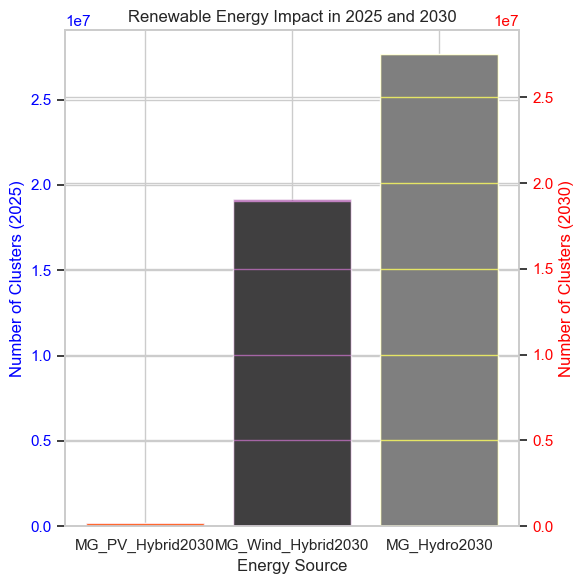

In [130]:
# Q5: Impact of renewable energy sources on 2025 and 2030 energy supply
renewable_impact_2025 = df[['MG_PV_Hybrid2025', 'MG_Wind_Hybrid2025', 'MG_Hydro2025']].sum()
renewable_impact_2030 = df[['MG_PV_Hybrid2030', 'MG_Wind_Hybrid2030', 'MG_Hydro2030']].sum()

print("Renewable energy sources' impact in 2025:\n", renewable_impact_2025)
print("Renewable energy sources' impact in 2030:\n", renewable_impact_2030)

# Plot renewable energy sources' impact in 2025 and 2030
fig, ax1 = plt.subplots(figsize=(6, 6))

# Plot 2025 data on primary y-axis
ax1.bar(renewable_impact_2025.index, renewable_impact_2025, color=['orange', 'green', 'blue'])
ax1.set_title('Renewable Energy Impact in 2025 and 2030')
ax1.set_xlabel('Energy Source')
ax1.set_ylabel('Number of Clusters (2025)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary y-axis for 2030 data
ax2 = ax1.twinx()
ax2.bar(renewable_impact_2030.index, renewable_impact_2030, color=['red', 'purple', 'yellow'], alpha=0.5)
ax2.set_ylabel('Number of Clusters (2030)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.show()


Investment cost per capita in 2025 by region:
 Admin1
Ayeyawaddy    718.128884
Bago (E)      662.374583
Bago (W)      588.090234
Chin          365.021203
Kachin        737.731578
Kayar         491.402328
Kayin         734.191337
Magway        526.691971
Mandalay      518.825444
Mon           740.554702
Rakhine       505.407632
Sagaing       608.496894
Shan (E)      595.064320
Shan (N)      638.547904
Shan (S)      568.594005
Taninthayi    699.922231
Yangon        673.859992
Name: InvestmentPerCapita2025, dtype: float64
Investment cost per capita in 2030 by region:
 Admin1
Ayeyawaddy    707.124431
Bago (E)      657.569400
Bago (W)      571.258444
Chin          259.915626
Kachin        701.339462
Kayar         469.722303
Kayin         721.998813
Magway        490.379083
Mandalay      500.568677
Mon           735.726044
Rakhine       450.141657
Sagaing       577.720917
Shan (E)      540.768036
Shan (N)      608.615242
Shan (S)      550.106930
Taninthayi    671.201710
Yangon        667.666

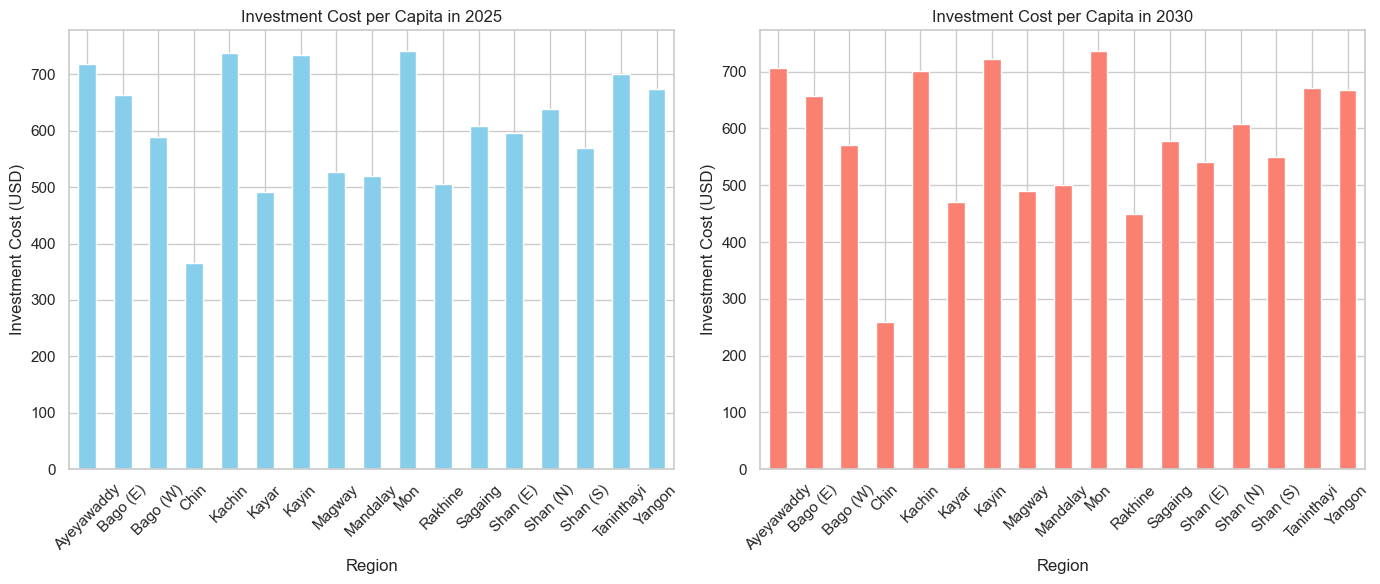

In [132]:
# Q6: Investment cost per capita in 2025 and 2030
df['InvestmentPerCapita2025'] = df['InvestmentCost2025'] / df['Pop2025']
df['InvestmentPerCapita2030'] = df['InvestmentCost2030'] / df['Pop2030']
investment_per_capita_2025 = df.groupby('Admin1')['InvestmentPerCapita2025'].mean()
investment_per_capita_2030 = df.groupby('Admin1')['InvestmentPerCapita2030'].mean()
print("Investment cost per capita in 2025 by region:\n", investment_per_capita_2025)
print("Investment cost per capita in 2030 by region:\n", investment_per_capita_2030)

# Plot investment cost per capita in 2025 and 2030 by region
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

investment_per_capita_2025.plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Investment Cost per Capita in 2025')
ax[0].set_xlabel('Region')
ax[0].set_ylabel('Investment Cost (USD)')
ax[0].tick_params(axis='x', rotation=45)

investment_per_capita_2030.plot(kind='bar', ax=ax[1], color='salmon')
ax[1].set_title('Investment Cost per Capita in 2030')
ax[1].set_xlabel('Region')
ax[1].set_ylabel('Investment Cost (USD)')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

/Users/misanmeggison/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/misanmeggison/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



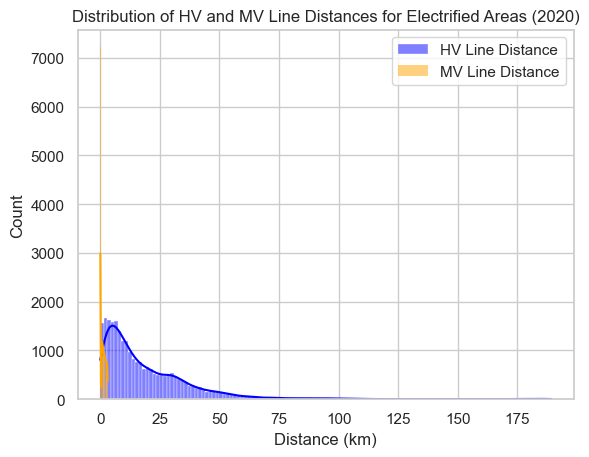

In [133]:
import plotly.express as px
import plotly.graph_objects as go


# Set Seaborn style for cleaner plots
sns.set(style="whitegrid")

### 1. Electrification Analysis ###

# Q1: Average distance to current HV and MV lines for electrified areas
avg_hv_mv_dist = df[df['FinalElecCode2020'] == 1][['CurrentHVLineDist', 'CurrentMVLineDist']].mean()

# Plot: Distribution of distances to HV and MV lines for electrified areas
sns.histplot(df[df['FinalElecCode2020'] == 1], x='CurrentHVLineDist', color='blue', label='HV Line Distance', kde=True)
sns.histplot(df[df['FinalElecCode2020'] == 1], x='CurrentMVLineDist', color='orange', label='MV Line Distance', kde=True)
plt.title('Distribution of HV and MV Line Distances for Electrified Areas (2020)')
plt.xlabel('Distance (km)')
plt.ylabel('Count')
plt.legend()
plt.show()

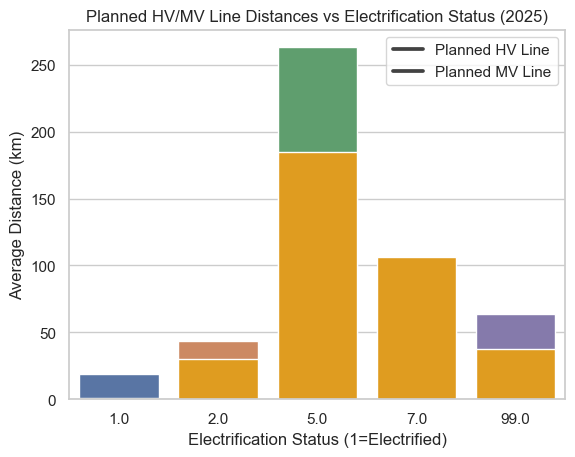

In [134]:
# Q2: Distance to planned HV/MV lines and electrification status in 2025
planned_dist_elec2025 = df.groupby('FinalElecCode2025')[['PlannedHVLineDist', 'PlannedMVLineDist']].mean()

# Plot: Distance to planned HV/MV lines by electrification status in 2025
sns.barplot(data=planned_dist_elec2025.reset_index(), x='FinalElecCode2025', y='PlannedHVLineDist', label='HV Line Distance')
sns.barplot(data=planned_dist_elec2025.reset_index(), x='FinalElecCode2025', y='PlannedMVLineDist', label='MV Line Distance', color='orange')
plt.title('Planned HV/MV Line Distances vs Electrification Status (2025)')
plt.xlabel('Electrification Status (1=Electrified)')
plt.ylabel('Average Distance (km)')
plt.legend(['Planned HV Line', 'Planned MV Line'])
plt.show()


In [136]:
# Q3: Population distribution based on electrification status in 2025
pop_elec2025 = df_dist_elect.groupby('FinalElecCode2025')['Pop'].sum().reset_index()

# Plot: Population distribution based on electrification status
fig = px.pie(pop_elec2025, values='Pop', names='FinalElecCode2025', title='Population Distribution by Electrification Status (2025)', hole=0.3)
fig.show()


/Users/misanmeggison/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



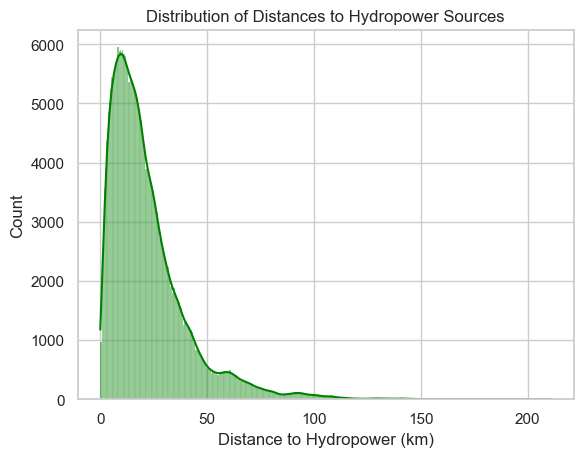

In [138]:
# Q1: Average distance to hydropower sources
avg_hydro_dist = df['HydropowerDist'].mean()

# Plot: Distribution of distances to hydropower sources
sns.histplot(df, x='HydropowerDist', color='green', kde=True)
plt.title('Distribution of Distances to Hydropower Sources')
plt.xlabel('Distance to Hydropower (km)')
plt.ylabel('Count')

plt.show()

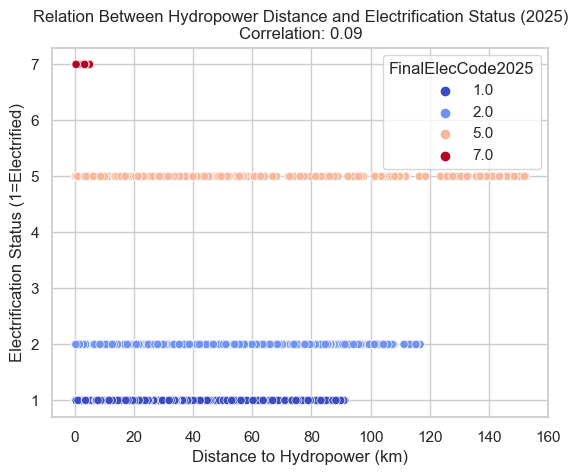

In [140]:
# Q2: Relation between distance to hydropower and electrification (2025)
hydro_elec_corr_2025 = df_dist_elect[['HydropowerDist', 'FinalElecCode2025']].corr().iloc[0, 1]

# Plot: Scatter plot of Hydropower Distance vs Electrification Status (2025)
sns.scatterplot(data=df_dist_elect, x='HydropowerDist', y='FinalElecCode2025', hue='FinalElecCode2025', palette='coolwarm')
plt.title(f'Relation Between Hydropower Distance and Electrification Status (2025)\nCorrelation: {hydro_elec_corr_2025:.2f}')
plt.xlabel('Distance to Hydropower (km)')
plt.ylabel('Electrification Status (1=Electrified)')
plt.show()

In [157]:
# Q1: Per capita demand for different regions
df['PerCapitaDemand'] = df['TotalEnergyPerCell'] / df['Pop']
per_capita_demand = df.groupby('Admin1')['PerCapitaDemand'].mean().reset_index()

# Plot: Per Capita Energy Demand by Region
fig = px.bar(per_capita_demand, x='Admin1', y='PerCapitaDemand', title='Per Capita Energy Demand by Region', labels={'PerCapitaDemand':'Per Capita Demand (kWh)'})

# xlabel
fig.update_xaxes(title_text='Region')
fig.show()

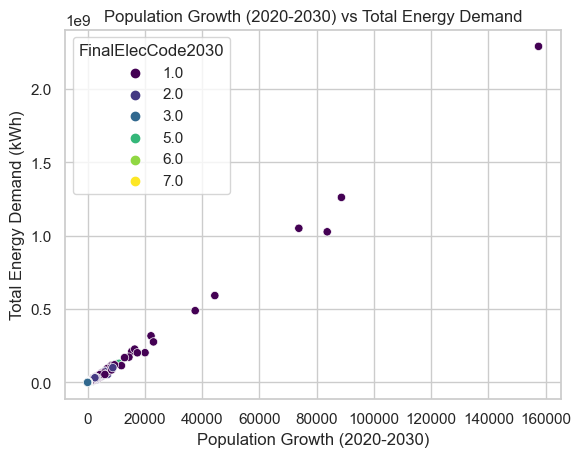

In [145]:
# Q2: Population growth vs Total Energy Demand (2020-2030)
df['PopGrowth2030'] = df['Pop2030'] - df['Pop2020']

# Plot: Scatter plot of Population Growth vs Total Energy Demand
sns.scatterplot(data=df, x='PopGrowth2030', y='TotalEnergyPerCell', hue='FinalElecCode2030', palette='viridis')
plt.title('Population Growth (2020-2030) vs Total Energy Demand')
plt.xlabel('Population Growth (2020-2030)')
plt.ylabel('Total Energy Demand (kWh)')
plt.show()

In [158]:
# Q4: Regions with highest commercial demand
high_commercial_demand = df[['Admin1', 'ResidentialDemandTierCustom']].sort_values(by='ResidentialDemandTierCustom', ascending=False).head(10)

fig = px.bar(high_commercial_demand, x='Admin1', y='ResidentialDemandTierCustom', title='Top 5 Regions with Highest Commercial Demand', labels={'ResidentialDemandTierCustom':'Residential Demand (kWh)'})
fig.update_xaxes(title_text='Region')
fig.show()

In [155]:
# Q5: Impact of renewable energy sources on 2025 and 2030 energy supply
renewable_impact_2025 = df[['MG_PV_Hybrid2025', 'MG_Wind_Hybrid2025', 'MG_Hydro2025']].sum().reset_index()
renewable_impact_2025.columns = ['Energy Source', 'Total Energy (kWh)']

# Plot: Renewable energy impact in 2025
fig = px.pie(renewable_impact_2025, values='Total Energy (kWh)', names='Energy Source', title='Renewable Energy Sources Impact in 2025', hole=0.3)
fig.show()

In [159]:
# Q1: Investment cost per capita in 2025 and 2030
df['InvestmentPerCapita2025'] = df['InvestmentCost2025'] / df['Pop2025']
df['InvestmentPerCapita2030'] = df['InvestmentCost2030'] / df['Pop2030']
investment_per_capita_2025 = df.groupby('Admin1')['InvestmentPerCapita2025'].mean().reset_index()
investment_per_capita_2030 = df.groupby('Admin1')['InvestmentPerCapita2030'].mean().reset_index()

# Plot: Investment Cost Per Capita by Region for 2025
fig = px.bar(investment_per_capita_2025, x='Admin1', y='InvestmentPerCapita2025', title='Investment Cost Per Capita by Region (2025)', labels={'InvestmentPerCapita2025':'Investment Cost per Capita (USD)'})
fig.update_xaxes(title_text='Region')
fig.show()

In [160]:
# Plot: Investment Cost Per Capita by Region for 2030
fig = px.bar(investment_per_capita_2030, x='Admin1', y='InvestmentPerCapita2030', title='Investment Cost Per Capita by Region (2030)', labels={'InvestmentPerCapita2030':'Investment Cost per Capita (USD)'})
fig.show()